**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [47]:
#get all packages required
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')

# import data 2C_weka.csv for 2 Class Classifcation.


In [48]:
weka2CDF = pd.read_csv("2Classdata.csv")
weka2CDF.sample(5)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
257         50.160078            -2.970024              42.000000   
132         69.626283            21.122751              52.766595   
35          31.484218             7.826221              24.284818   
46          48.332638            22.227784              36.181993   
32          44.936675            17.443838              27.780576   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
257     53.130102     131.802491                 -8.290203    Normal  
132     48.503532     116.803091                 54.816867  Abnormal  
35      23.657997     113.833145                  4.393080  Abnormal  
46      26.104854     117.384625                  6.481709  Abnormal  
32      27.492837     117.980325                  5.569620  Abnormal

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [49]:
#Look at the head and tail of dataset. 
weka2CDF.head(5).append(weka2CDF.tail(5))

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  
1       28.995960     114.405425                  4.564259  Abnormal  
2       46.613539     105.985135                 -3.530317  Abnormal  
3       44.644130     101.868495                 11.211523  Abnormal  
4       40.060784     108.168725                  7.918501  Abnormal  
305     34.286877     117.449062                 -4.245395    Normal  
306     33.215251     114.365845                 -0.421010    Normal  
307     38.751628     125.670725                 -2.707880    Normal  
308     36.559635     118.545842                  0.214750    Normal  
309     28.767649     123.945244                 -0.199249    Normal

In [50]:
#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", weka2CDF.isna().sum())
print("Null values\n", weka2CDF.isnull().sum())

NA values
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Null values
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [51]:
#Look at the unique values of class values.
#the unique values of class values
print("Unique values of attribute - class", weka2CDF["class"].unique())

#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for wekaClass in weka2CDF.items():
    print(wekaClass[0], wekaClass[1].nunique())

Unique values of attribute - class ['Abnormal' 'Normal']

Number of unique values of other attributes
pelvic_incidence 310
pelvic_tilt numeric 310
lumbar_lordosis_angle 280
sacral_slope 281
pelvic_radius 310
degree_spondylolisthesis 310
class 2


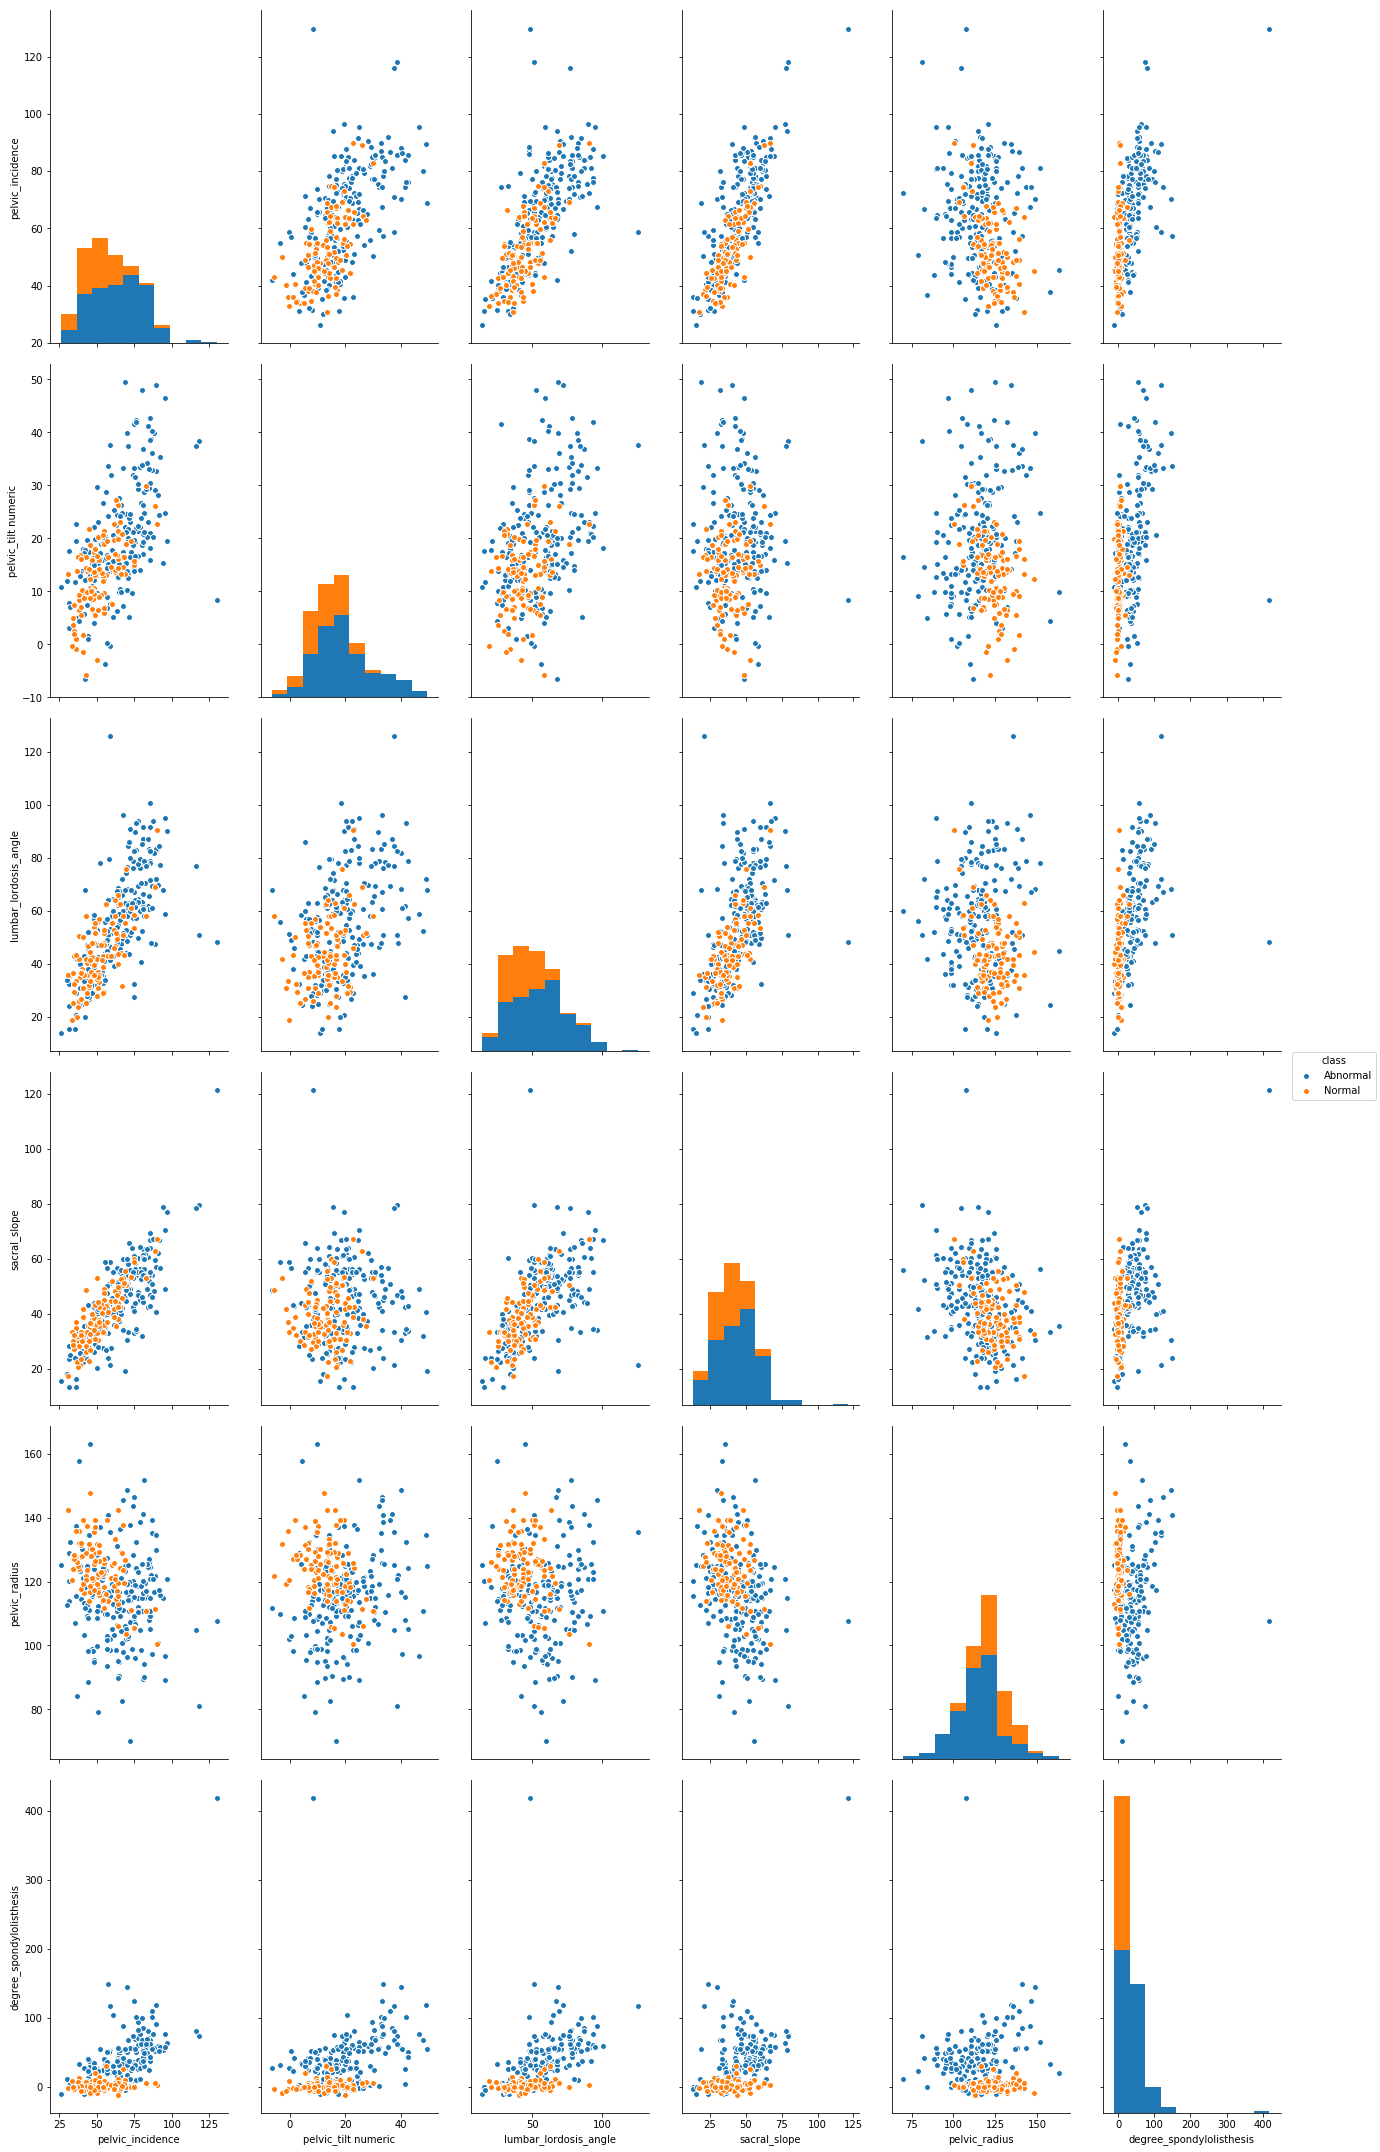

In [52]:
#Look at the distribution of class values and other attributes. 
sns.pairplot(weka2CDF, hue="class", size=5, aspect=0.6)
plt.show()

In [53]:
#Get the datatype information about the dataset
print(weka2CDF.dtypes)

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object


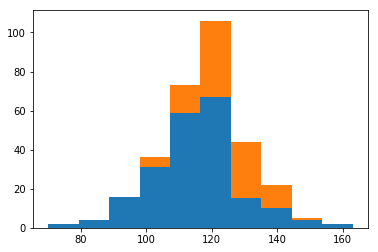

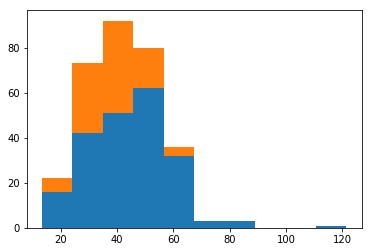

In [54]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
#using histogram
histData = [weka2CDF.pelvic_radius[weka2CDF["class"]==cls_name] for cls_name in ['Abnormal', 'Normal']]
plt.hist(histData, histtype='bar', stacked=True)
plt.show()

histData = [weka2CDF.sacral_slope[weka2CDF["class"]==cls_name] for cls_name in ['Abnormal', 'Normal']]
plt.hist(histData, histtype='bar', stacked=True)
plt.show()

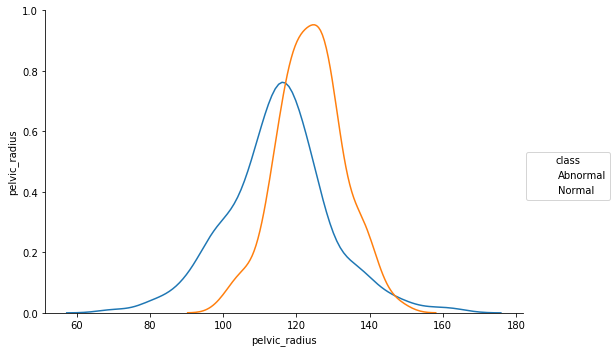

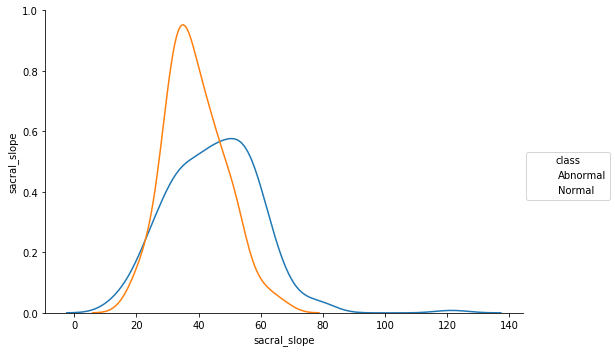

In [55]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
#using pair plot cheking the kde
sns.pairplot(weka2CDF[["pelvic_radius", "class"]], diag_kind="kde", hue="class", size=5, aspect=1.5)
plt.show()
sns.pairplot(weka2CDF[["sacral_slope", "class"]], diag_kind="kde", hue="class", size=5, aspect=1.5)
plt.show()

# Encode the Class variable to integer.

In [56]:
#LabelEncoder encodes string into numeric values. Pass the class feature to fit transform to transform to numeric values
encoder = preprocessing.LabelEncoder()
weka2CDF["class"] = encoder.fit_transform(weka2CDF["class"])
#check if the class has changed to numeric values and the datatype is also numeric
print(weka2CDF["class"].dtype, weka2CDF["class"].unique())

int64 [0 1]


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [57]:
#Preparing Y - Feature to be learnt and then identified
Y = weka2CDF['class']
#Preparing X - All required columns except the identified Y & ID which has no significance
X = weka2CDF.drop(['class'],axis=1)

In [58]:
#Get the X & Y split into 80% training data nad 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=5)

# Normalize your Data (X) to get values between 0 to 1.

In [59]:
#scale the value of training to ensure that big numbers dont bias the result
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
scaledX_train

array([[-1.0112122 , -0.69307025, -1.25974777, -0.80543254,  0.45710657,
        -0.78999867],
       [ 0.68975492,  0.74514511,  1.53891246,  0.32618047, -0.79504414,
         0.99441756],
       [-1.45253878,  0.23160553, -1.71239111, -2.16251912,  1.53852645,
        -0.85540721],
       ...,
       [ 0.30561966,  0.69208164, -0.33464129, -0.15204268,  1.45397587,
        -0.31238041],
       [ 1.29987109,  1.192088  ,  1.38399834,  0.78855756, -0.03661806,
         1.20126996],
       [ 2.07035997,  2.8793386 ,  0.39199415,  0.45239427, -1.60100248,
         1.67499392]])

# Split the dat as train and test with a ratio of 70:30.

In [60]:
#Split of data already done. Normalization has to be done after spliting 
#normalization training and testing data are done seperately

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [61]:
#creating an array of k values to be used for model
kValues = [6]


#Run knn.fit for different k values and predict the y values for test
for k in kValues:
    #get the knn instance for the given k value
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the scaled X training data against the corresponding Y training result
    knn.fit(scaledX_train, Y_train)
    #Predict the Y value for the X test set
    y_testPredict = knn.predict(scaledX_test)
    #compare the accuracy of prediction
    accuracy = metrics.accuracy_score(Y_test, y_testPredict)
    #print the accuracy score against each k
    print("Testting accuracy for k = %d is %f" %(k, accuracy))

Testting accuracy for k = 6 is 0.806452


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [62]:
knn.score(scaledX_test, Y_test)

0.8064516129032258

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [63]:
#use the same data X, Y - Train and Test for the operation
kValues = np.arange(5, 20)

#declare the array for noting down the accuracy
train_accuracy_plot = np.empty(len(kValues))
test_accuracy_plot = np.empty(len(kValues))
diff_plot = np.empty(len(kValues))
i = 0

#loop through each value of k
for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train, Y_train)
    Y_trainPredict = knn.predict(scaledX_train)
    train_accuracy_plot[i] = metrics.accuracy_score(Y_train, Y_trainPredict)
    Y_testPredict = knn.predict(scaledX_test)
    test_accuracy_plot[i] = metrics.accuracy_score(Y_test, Y_testPredict)
    diff_plot[i] = abs(train_accuracy_plot[i] - test_accuracy_plot[i])
    print(k, "-", test_accuracy_plot[i])
    i = i+1

5 - 0.8279569892473119
6 - 0.8064516129032258
7 - 0.7956989247311828
8 - 0.8064516129032258
9 - 0.8064516129032258
10 - 0.7956989247311828
11 - 0.7849462365591398
12 - 0.8064516129032258
13 - 0.8172043010752689
14 - 0.7956989247311828
15 - 0.8387096774193549
16 - 0.8279569892473119
17 - 0.8279569892473119
18 - 0.8387096774193549
19 - 0.8387096774193549


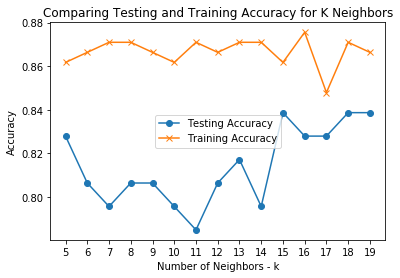

In [64]:
plt.title('Comparing Testing and Training Accuracy for K Neighbors')
plt.plot(kValues, test_accuracy_plot, label = 'Testing Accuracy', marker='o')
plt.plot(kValues, train_accuracy_plot, label = 'Training Accuracy', marker='x')
plt.legend()
plt.xlabel('Number of Neighbors - k')
plt.ylabel('Accuracy')
plt.xticks(kValues, kValues)
plt.show()

In [65]:
print("K value  would be 15 where the testing accurancy is highest and also closer to the training accuracy")

K value  would be 15 where the testing accurancy is highest and also closer to the training accuracy


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [66]:
weka3CDF = pd.read_csv("3Classdata.csv")
weka3CDF.sample(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
94          94.174822    15.380770              67.705721     78.794052   
250         36.157830    -0.810514              33.627314     36.968344   
278         40.413366    -1.329412              30.982768     41.742778   
19          41.729963    12.254074              30.122586     29.475889   
72          84.974132    33.021175              60.859873     51.952957   

     pelvic_radius  degree_spondylolisthesis              class  
94      114.890113                 53.255220  Spondylolisthesis  
250     135.936910                 -2.092507             Normal  
278     119.335655                 -6.173675             Normal  
19      116.585706                 -1.244402             Hernia  
72      125.659534                 74.333409  Spondylolisthesis

In [67]:
#Look at the head and tail of dataset. 
weka3CDF.head(5).append(weka3CDF.tail(5))

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis   class  
0        98.672917                 -0.254400  Hernia  
1       114.405425                  4.564259  Hernia  
2       105.985135                 -3.530317  Hernia  
3       101.868495                 11.211523  Hernia  
4       108.168725                  7.918501  Hernia  
305     117.449062                 -4.245395  Normal  
306     114.365845                 -0.421010  Normal  
307     125.670725                 -2.707880  Normal  
308     118.545842                  0.214750  Normal  
309     123.945244                 -0.199249  Normal

In [68]:
#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", weka3CDF.isna().sum())
print("Null values\n", weka3CDF.isnull().sum())

NA values
 pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Null values
 pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [69]:
#Look at the unique values of class values.
#the unique values of class values
print("Unique values of attribute - class", weka3CDF["class"].unique())

#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for wekaClass in weka3CDF.items():
    print(wekaClass[0], wekaClass[1].nunique())

Unique values of attribute - class ['Hernia' 'Spondylolisthesis' 'Normal']

Number of unique values of other attributes
pelvic_incidence 310
pelvic_tilt 310
lumbar_lordosis_angle 280
sacral_slope 281
pelvic_radius 310
degree_spondylolisthesis 310
class 3


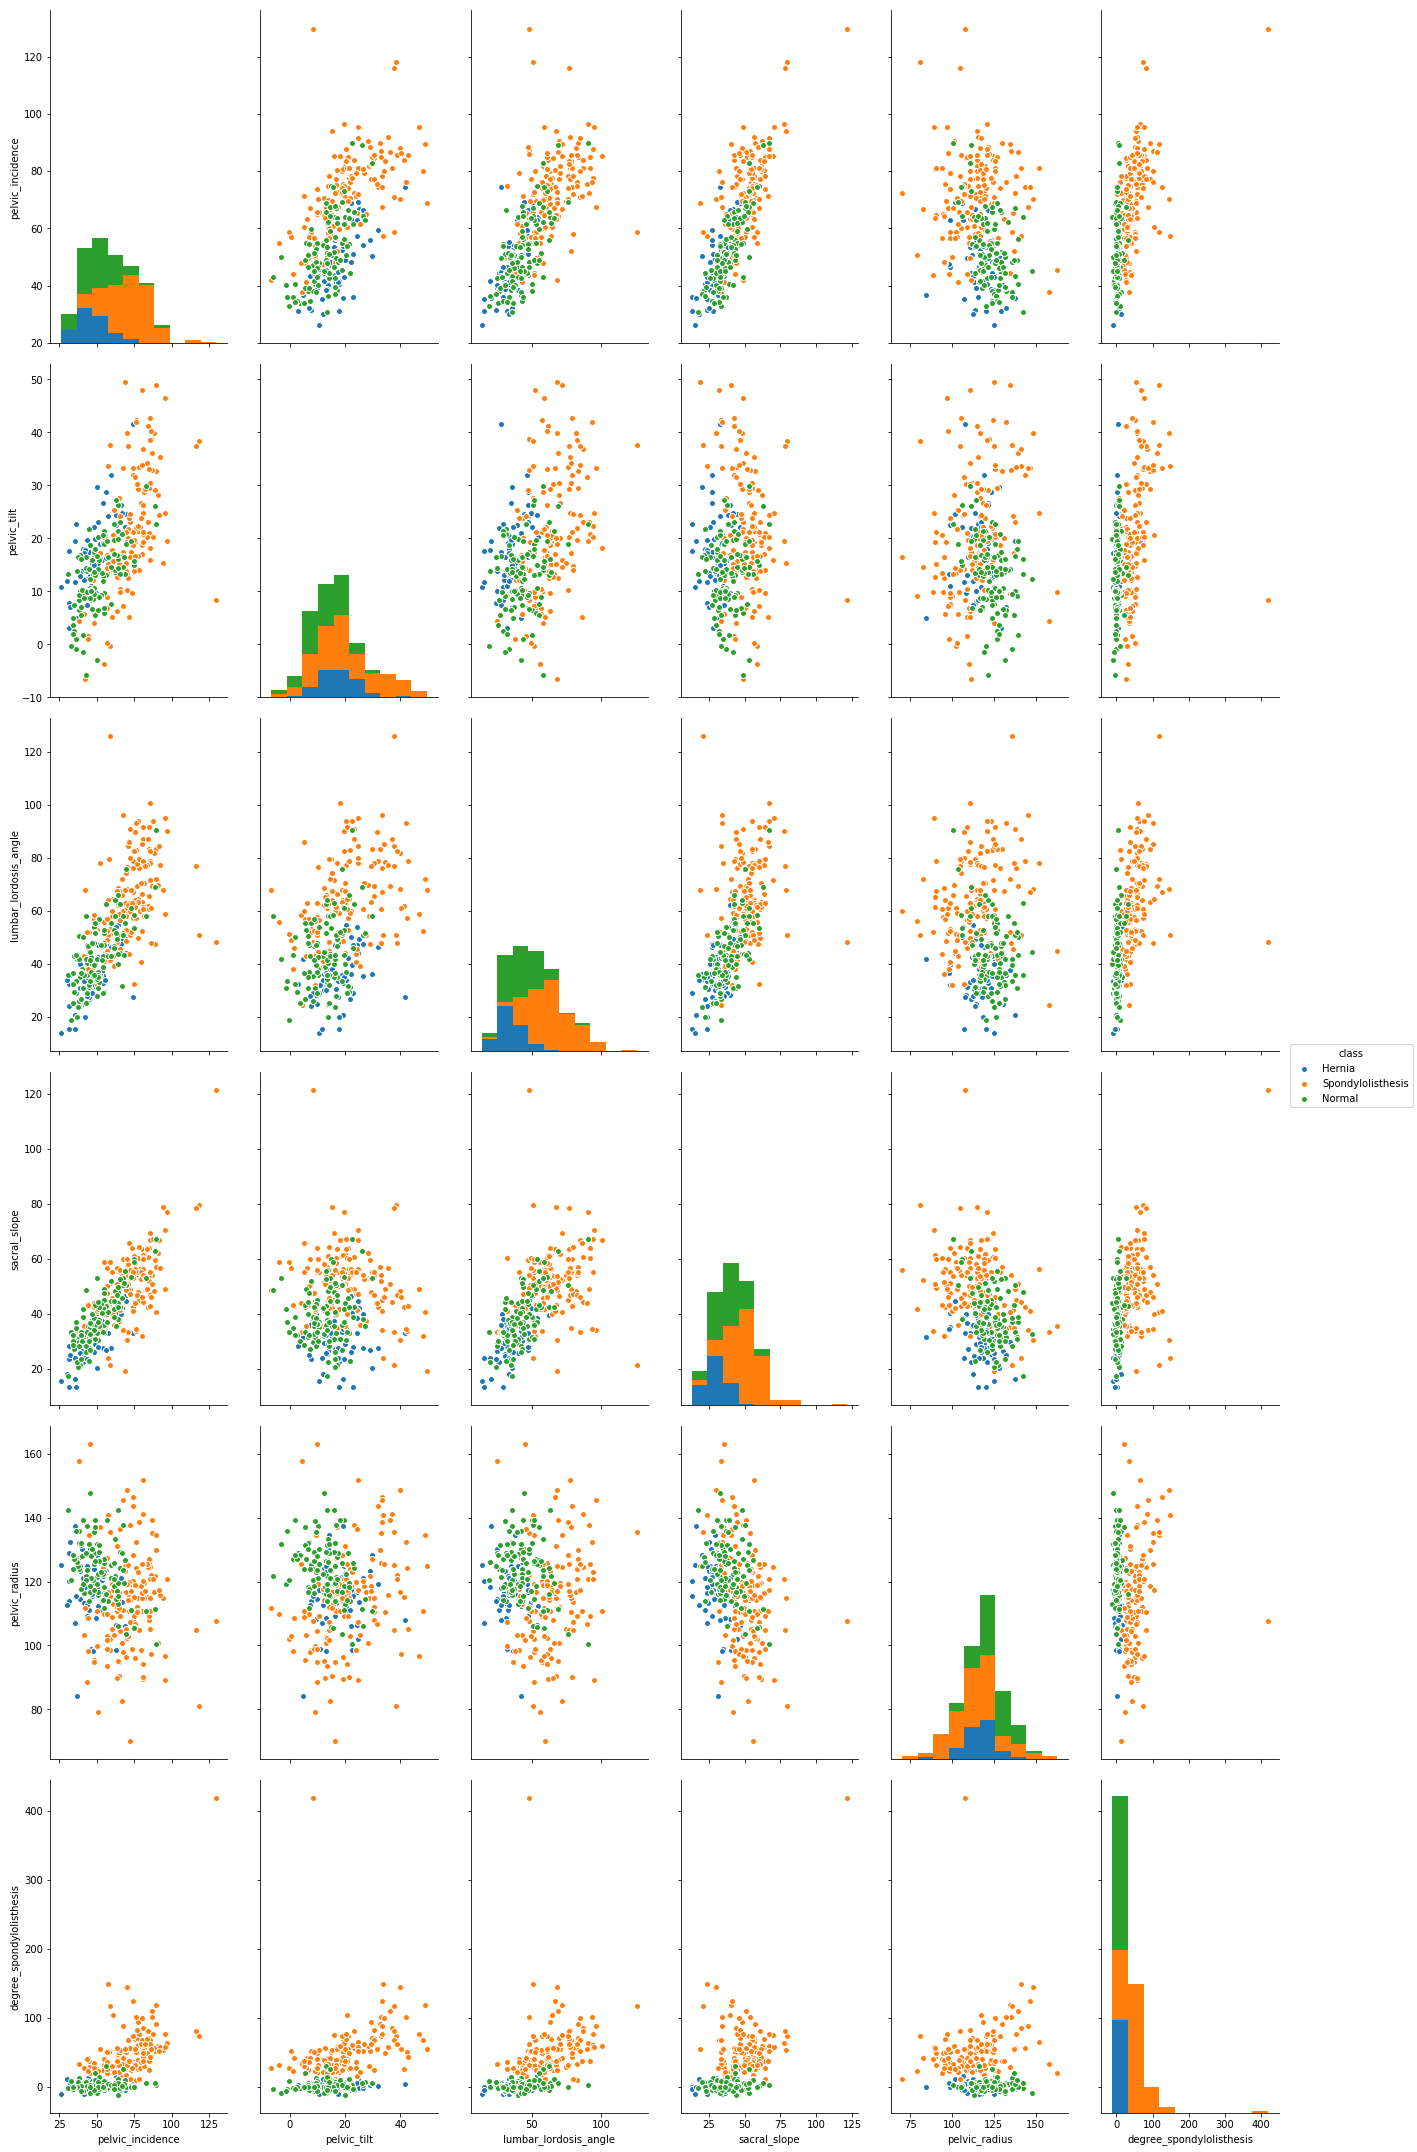

In [70]:
#Look at the distribution of class values and other attributes. 
sns.pairplot(weka3CDF, hue="class", size=5, aspect=0.6)
plt.show()

In [71]:
#Get the datatype information about the dataset
print(weka3CDF.dtypes)

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object


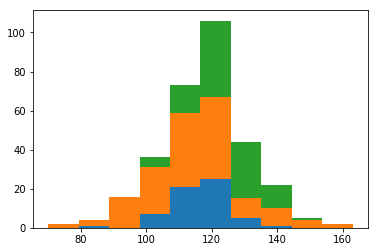

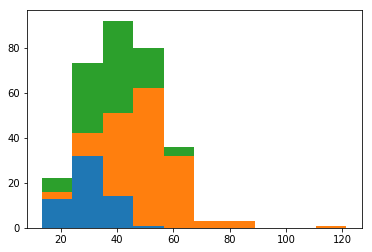

In [72]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
#using histogram
histData = [weka3CDF.pelvic_radius[weka3CDF["class"]==cls_name] for cls_name in ['Hernia','Spondylolisthesis','Normal']]
plt.hist(histData, histtype='bar', stacked=True)
plt.show()

histData = [weka3CDF.sacral_slope[weka3CDF["class"]==cls_name] for cls_name in ['Hernia','Spondylolisthesis','Normal']]
plt.hist(histData, histtype='bar', stacked=True)
plt.show()

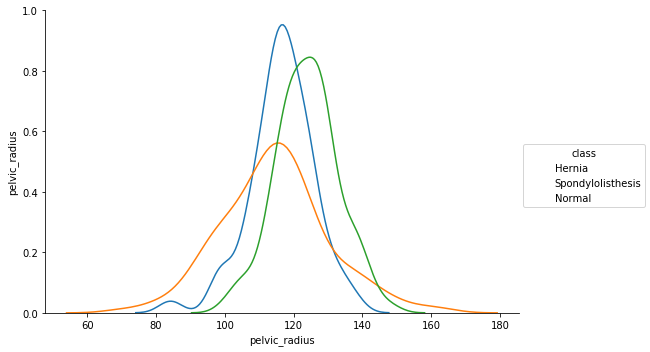

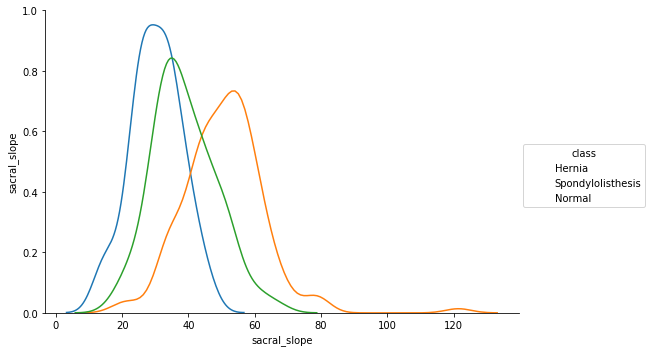

In [73]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
#using pair plot cheking the kde
sns.pairplot(weka3CDF[["pelvic_radius", "class"]], diag_kind="kde", hue="class", size=5, aspect=1.5)
plt.show()
sns.pairplot(weka3CDF[["sacral_slope", "class"]], diag_kind="kde", hue="class", size=5, aspect=1.5)
plt.show()

In [74]:
weka3CDF.groupby(by=["class"]).count()["pelvic_incidence"]

class
Hernia                60
Normal               100
Spondylolisthesis    150
Name: pelvic_incidence, dtype: int64

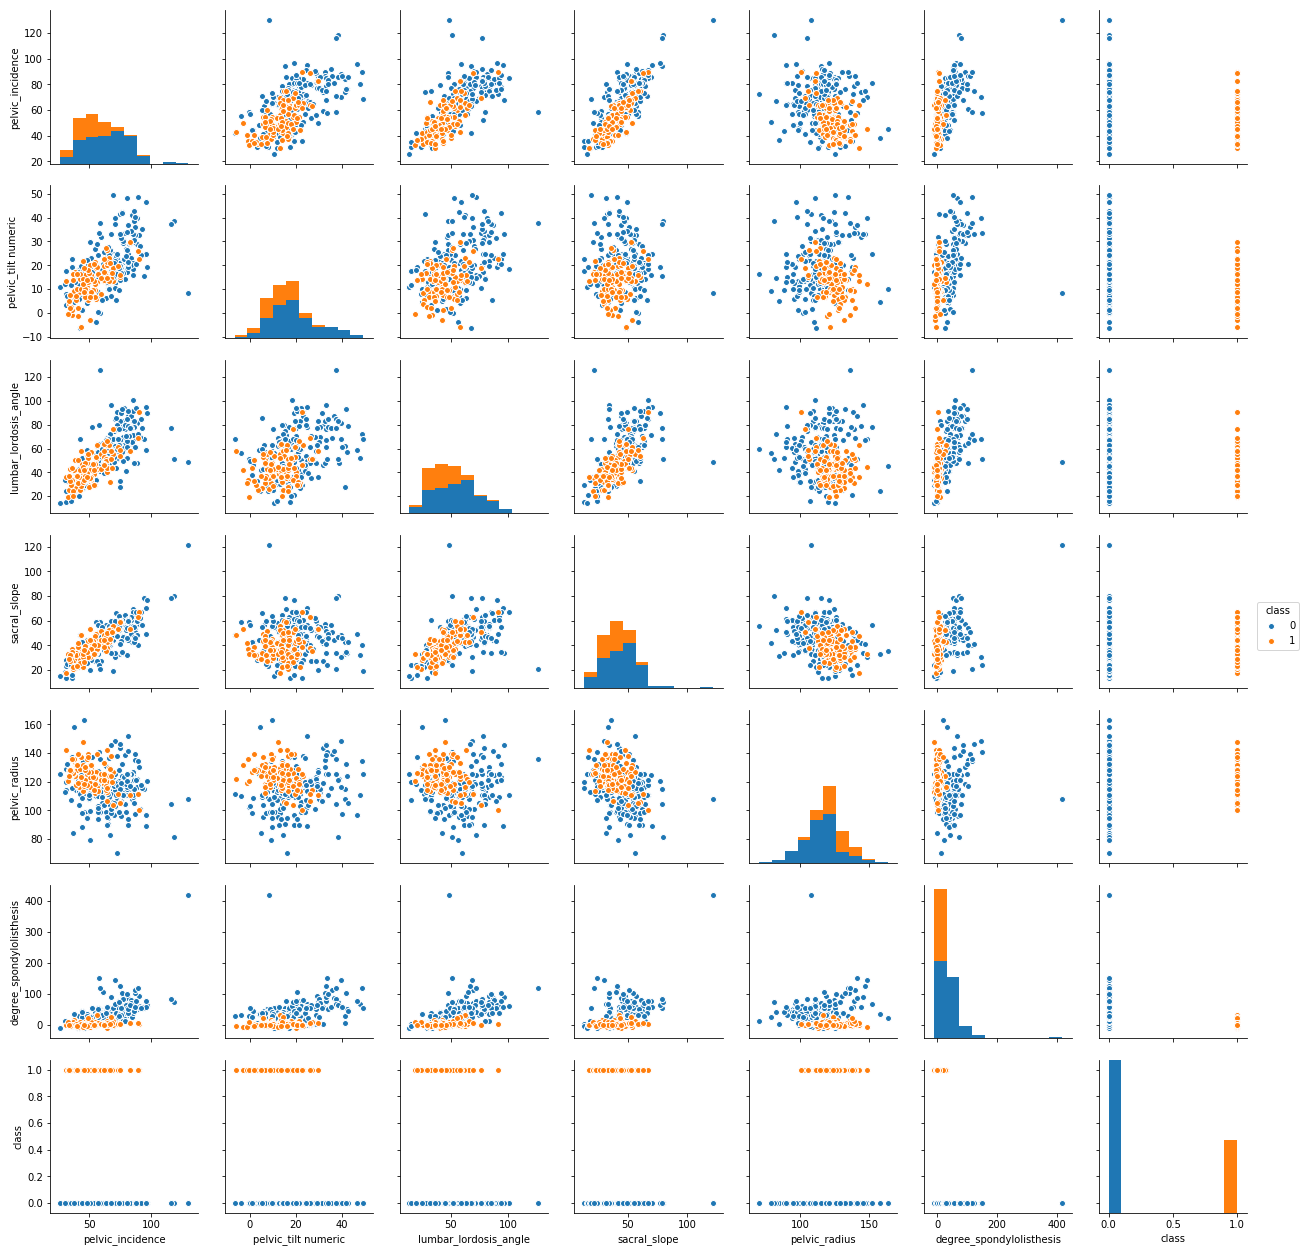

In [75]:
sns.pairplot(weka2CDF, hue="class")
plt.show()

In [76]:
#LabelEncoder encodes string into numeric values. Pass the class feature to fit transform to transform to numeric values
encoder = preprocessing.LabelEncoder()
weka3CDF["class"] = encoder.fit_transform(weka3CDF["class"])
#check if the class has changed to numeric values and the datatype is also numeric
print(weka3CDF["class"].dtype, weka3CDF["class"].unique())

int64 [0 2 1]


In [77]:
#Preparing Y - Feature to be learnt and then identified
Y = weka3CDF['class']
#Preparing X - All required columns except the identified Y & ID which has no significance
X = weka3CDF.drop(['class'],axis=1)

In [78]:
#Get the X & Y split into 80% training data nad 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=5)

In [79]:
#scale the value of training to ensure that big numbers dont bias the result
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [80]:
#creating an array of k values to be used for model
kValues = [6]


#Run knn.fit for different k values and predict the y values for test
for k in kValues:
    #get the knn instance for the given k value
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the scaled X training data against the corresponding Y training result
    knn.fit(scaledX_train, Y_train)
    #Predict the Y value for the X test set
    y_testPredict = knn.predict(scaledX_test)
    #compare the accuracy of prediction
    accuracy = metrics.accuracy_score(Y_test, y_testPredict)
    #print the accuracy score against each k
    print("Testting accuracy for k = %d is %f" %(k, accuracy))

Testting accuracy for k = 6 is 0.806452


In [81]:
knn.score(scaledX_test, Y_test)

0.8064516129032258

In [82]:
#use the same data X, Y - Train and Test for the operation
kValues = np.arange(2, 25)

#declare the array for noting down the accuracy
train_accuracy_plot = np.empty(len(kValues))
test_accuracy_plot = np.empty(len(kValues))
diff_plot = np.empty(len(kValues))
i = 0

#loop through each value of k
for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train, Y_train)
    Y_trainPredict = knn.predict(scaledX_train)
    train_accuracy_plot[i] = metrics.accuracy_score(Y_train, Y_trainPredict)
    Y_testPredict = knn.predict(scaledX_test)
    test_accuracy_plot[i] = metrics.accuracy_score(Y_test, Y_testPredict)
    diff_plot[i] = abs(train_accuracy_plot[i] - test_accuracy_plot[i])
    print(k, "-", test_accuracy_plot[i])
    i = i+1

2 - 0.7741935483870968
3 - 0.8064516129032258
4 - 0.8172043010752689
5 - 0.8387096774193549
6 - 0.8064516129032258
7 - 0.7956989247311828
8 - 0.7956989247311828
9 - 0.7956989247311828
10 - 0.7956989247311828
11 - 0.7741935483870968
12 - 0.8064516129032258
13 - 0.8064516129032258
14 - 0.7849462365591398
15 - 0.8279569892473119
16 - 0.7956989247311828
17 - 0.8064516129032258
18 - 0.7741935483870968
19 - 0.8064516129032258
20 - 0.7956989247311828
21 - 0.7956989247311828
22 - 0.7849462365591398
23 - 0.7741935483870968
24 - 0.7634408602150538


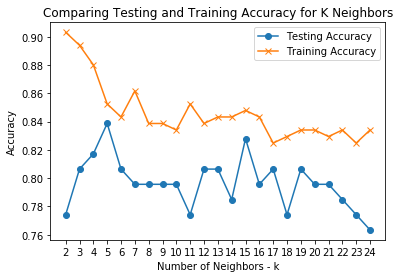

In [83]:
plt.title('Comparing Testing and Training Accuracy for K Neighbors')
plt.plot(kValues, test_accuracy_plot, label = 'Testing Accuracy', marker='o')
plt.plot(kValues, train_accuracy_plot, label = 'Training Accuracy', marker='x')
plt.legend()
plt.xlabel('Number of Neighbors - k')
plt.ylabel('Accuracy')
plt.xticks(kValues, kValues)
plt.show()

In [84]:
print("K value  would be 5 or 15 where the testing accurancy is highest and also closer to the training accuracy")

K value  would be 5 or 15 where the testing accurancy is highest and also closer to the training accuracy
